### EDA On Flight Fare Prediction

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")


In [125]:
pd.set_option('display.max_columns',None)
train_data = pd.read_excel("Dataset/Data_Train.xlsx")


In [126]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [127]:
train_data.shape

(10683, 11)

In [128]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [129]:
### Most of my columns data types are in object form...I need to transform them

In [130]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [131]:
train_data.dropna(axis=0,inplace=True)

In [132]:
### dropping the null values

In [133]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [134]:
train_data.shape

(10682, 11)

In [135]:
train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


In [136]:
### converting date_of_journey column into datetime format
train_data["Date_of_Journey"] = pd.to_datetime(train_data["Date_of_Journey"], infer_datetime_format = True)

In [137]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1001.4+ KB


In [138]:
### Not extracting years from from date of journey as only one year "2019" data is present
train_data["Journey_Day"] = train_data["Date_of_Journey"].dt.day
train_data["Journey_Month"] = train_data["Date_of_Journey"].dt.month


In [139]:
train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [140]:
### dropped Date_of_Journey column
train_data.drop("Date_of_Journey", axis=1,inplace=True)

In [141]:
### extracting dep_hour and dep_minute from departure time columns
train_data["Dep_hour"]= train_data["Dep_Time"].str.split(":").str[0]
train_data["Dep_Minute"] = train_data["Dep_Time"].str.split(":").str[1]

In [142]:
train_data.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [143]:
train_data.drop("Dep_Time", axis=1,inplace=True)

In [144]:
train_data.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


In [145]:
### extracting only time from the arrival time columns and removing information about day and month
train_data["Arrival_Time"] = train_data["Arrival_Time"].str.split(" ").str[0]

In [146]:
train_data.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,22,20


In [147]:
### extracting arrival_hour and arrival_minute from Arrival_Time column
train_data["Arrival_hour"] = train_data["Arrival_Time"].str.split(":").str[0]
train_data["Arrival_minute"] = train_data["Arrival_Time"].str.split(":").str[1]

In [148]:
train_data.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,22,20,01,10


In [149]:
train_data.drop("Arrival_Time", axis=1,inplace=True)

In [150]:
### extracting duration_hour and duration_minute from duration column
train_data["Duration_hour"] = train_data["Duration"].str.split(" ").str[0].str.split("h").str[0]
train_data["Duration_minutes"] = train_data["Duration"].str.split(" ").str[1].str.split("m").str[0]

In [151]:
train_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,01,10,2,50


In [152]:
train_data.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Duration               0
Total_Stops            0
Additional_Info        0
Price                  0
Journey_Day            0
Journey_Month          0
Dep_hour               0
Dep_Minute             0
Arrival_hour           0
Arrival_minute         0
Duration_hour          0
Duration_minutes    1032
dtype: int64

In [153]:
len(train_data[train_data["Duration_minutes"].isnull()])

1032

In [154]:
train_data["Duration_minutes"] = train_data["Duration_minutes"].fillna(0)


In [155]:
train_data.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Duration            0
Total_Stops         0
Additional_Info     0
Price               0
Journey_Day         0
Journey_Month       0
Dep_hour            0
Dep_Minute          0
Arrival_hour        0
Arrival_minute      0
Duration_hour       0
Duration_minutes    0
dtype: int64

In [156]:
train_data.drop("Duration", axis=1,inplace=True)

In [157]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Total_Stops       10682 non-null  object
 5   Additional_Info   10682 non-null  object
 6   Price             10682 non-null  int64 
 7   Journey_Day       10682 non-null  int64 
 8   Journey_Month     10682 non-null  int64 
 9   Dep_hour          10682 non-null  object
 10  Dep_Minute        10682 non-null  object
 11  Arrival_hour      10682 non-null  object
 12  Arrival_minute    10682 non-null  object
 13  Duration_hour     10682 non-null  object
 14  Duration_minutes  10682 non-null  object
dtypes: int64(3), object(12)
memory usage: 1.3+ MB


In [158]:
train_data[train_data["Duration_hour"] == "5m"]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,17327,6,3,16,50,16,55,5m,0


In [159]:
train_data.drop(6474, axis = 0, inplace = True)

In [160]:
train_data[train_data["Duration_hour"] == "5m"]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes


In [161]:
train_data["Dep_hour"]  = train_data["Dep_hour"].astype(int)
train_data["Dep_Minute"]  = train_data["Dep_Minute"].astype(int)
train_data["Arrival_hour"] = train_data["Arrival_hour"].astype(int)
train_data["Arrival_minute"] = train_data["Arrival_minute"].astype(int)
train_data["Duration_minutes"] = train_data["Duration_minutes"].astype(int)
train_data["Duration_hour"] = train_data["Duration_hour"].astype(int)

In [162]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10681 non-null  object
 1   Source            10681 non-null  object
 2   Destination       10681 non-null  object
 3   Route             10681 non-null  object
 4   Total_Stops       10681 non-null  object
 5   Additional_Info   10681 non-null  object
 6   Price             10681 non-null  int64 
 7   Journey_Day       10681 non-null  int64 
 8   Journey_Month     10681 non-null  int64 
 9   Dep_hour          10681 non-null  int32 
 10  Dep_Minute        10681 non-null  int32 
 11  Arrival_hour      10681 non-null  int32 
 12  Arrival_minute    10681 non-null  int32 
 13  Duration_hour     10681 non-null  int32 
 14  Duration_minutes  10681 non-null  int32 
dtypes: int32(6), int64(3), object(6)
memory usage: 1.1+ MB


In [163]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_hour',
       'Dep_Minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour',
       'Duration_minutes'],
      dtype='object')

### Handling Categorical Data

In [164]:
train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [165]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

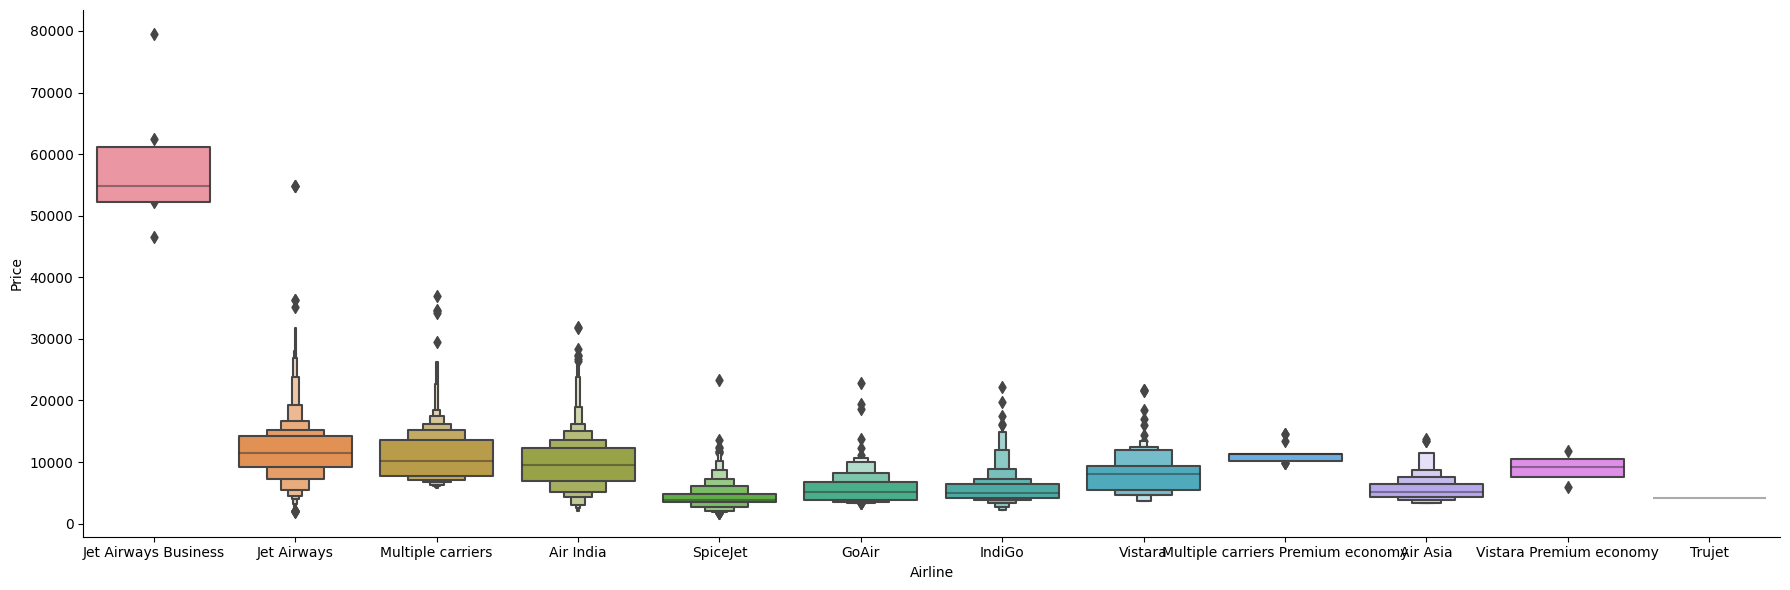

In [166]:
sns.catplot(y= "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False),kind='boxen' , height = 6, aspect = 3 )
plt.show()  

In [167]:
Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [168]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

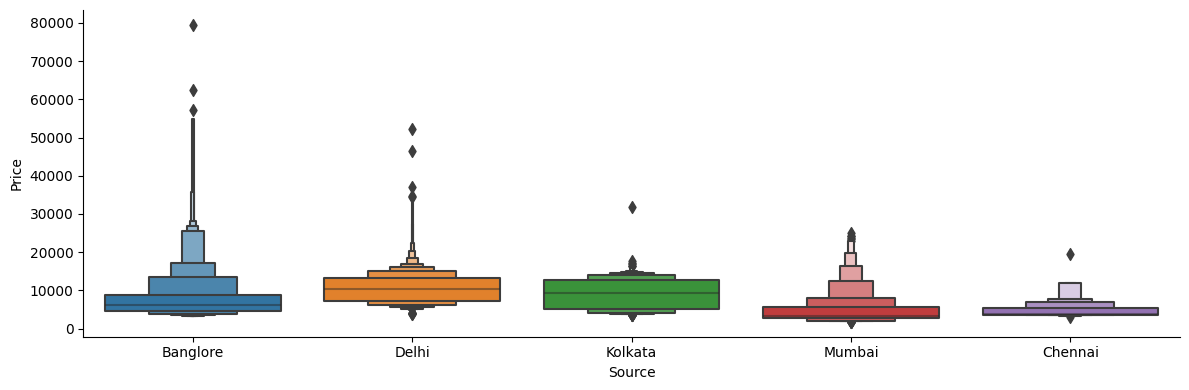

In [169]:
sns.catplot(y= "Price", x = "Source", data = train_data.sort_values("Price", ascending = False),kind='boxen' , height = 4, aspect = 3 )
plt.show()

In [170]:
Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [171]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

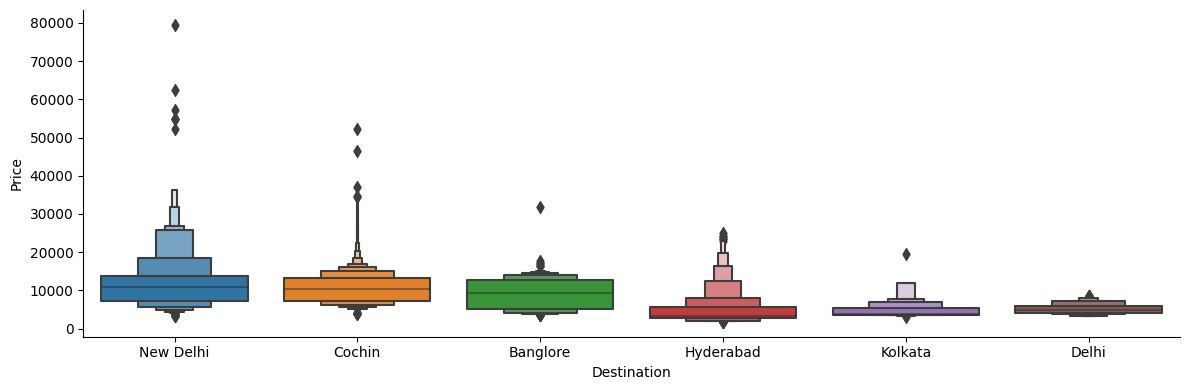

In [172]:
sns.catplot(y= "Price", x = "Destination", data = train_data.sort_values("Price", ascending = False),kind='boxen' , height = 4, aspect = 3 )
plt.show()
     

In [173]:
Destination= train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [174]:
train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [175]:
train_data["Route"].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [176]:
train_data["Additional_Info"].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [177]:
train_data.drop(["Route","Additional_Info" ], axis=1, inplace=True)

In [178]:
train_data.head(1)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50


In [179]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [180]:
train_data["Total_Stops"] = train_data["Total_Stops"].map({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4})

In [181]:
train_data["Total_Stops"].value_counts()

1    5625
0    3491
2    1519
3      45
4       1
Name: Total_Stops, dtype: int64

In [182]:
train_data.head(1)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50


In [183]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [184]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [185]:
data_train.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

In [186]:
data_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [187]:
data_train.shape

(10681, 30)

### Test_Data

In [188]:
test_data = pd.read_excel("Dataset/Test_set.xlsx")

In [189]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [190]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


### Preprocessing of Numerical features 

In [191]:
### converting date_of_journey column into datetime format
test_data["Date_of_Journey"] = pd.to_datetime(test_data["Date_of_Journey"], infer_datetime_format = True)
### Not extracting years from from date of journey as only one year "2019" data is present
test_data["Journey_Day"] = test_data["Date_of_Journey"].dt.day
test_data["Journey_Month"] = test_data["Date_of_Journey"].dt.month
### dropped Date_of_Journey column
test_data.drop("Date_of_Journey", axis=1,inplace=True)



### extracting dep_hour and dep_minute from departure time columns
test_data["Dep_hour"]= test_data["Dep_Time"].str.split(":").str[0]
test_data["Dep_Minute"] = test_data["Dep_Time"].str.split(":").str[1]
test_data.drop("Dep_Time", axis=1,inplace=True)



### extracting only time from the arrival time columns and removing information about day and month
test_data["Arrival_Time"] = test_data["Arrival_Time"].str.split(" ").str[0]
### extracting arrival_hour and arrival_minute from Arrival_Time column
test_data["Arrival_hour"] = test_data["Arrival_Time"].str.split(":").str[0]
test_data["Arrival_minute"] = test_data["Arrival_Time"].str.split(":").str[1]
test_data.drop("Arrival_Time", axis=1,inplace=True)



### extracting duration_hour and duration_minute from duration column
test_data["Duration_hour"] = test_data["Duration"].str.split(" ").str[0].str.split("h").str[0]
test_data["Duration_minutes"] = test_data["Duration"].str.split(" ").str[1].str.split("m").str[0]
test_data["Duration_minutes"] = test_data["Duration_minutes"].fillna(0)
test_data.drop("Duration", axis=1,inplace=True)


test_data[test_data["Duration_hour"] == "5m"]
test_data.drop(2660, axis = 0, inplace = True)
test_data[test_data["Duration_hour"] == "5m"]


test_data["Dep_hour"]  = test_data["Dep_hour"].astype(int)
test_data["Dep_Minute"]  = test_data["Dep_Minute"].astype(int)
test_data["Arrival_hour"] = test_data["Arrival_hour"].astype(int)
test_data["Arrival_minute"] = test_data["Arrival_minute"].astype(int)
test_data["Duration_minutes"] = test_data["Duration_minutes"].astype(int)
test_data["Duration_hour"] = test_data["Duration_hour"].astype(int)


### Preprocessing of Categorical features 

In [192]:
Airline = test_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)

Airline.head()


Source = test_data[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)

Source.head()


Destination= test_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()


test_data.drop(["Route","Additional_Info" ], axis=1, inplace=True)
test_data["Total_Stops"] = test_data["Total_Stops"].map({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4})

In [193]:
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

In [194]:
data_test.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

In [195]:
data_test.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [196]:
data_test.shape

(2670, 28)

### Feature Selection

In [197]:
### Finding out the best feature which will contribute and have good relationship with target variable

In [198]:
data_train.shape

(10681, 30)

In [199]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_hour',
       'Dep_Minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [200]:
data_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [201]:
X = data_train.loc[:, ['Total_Stops','Journey_Day', 'Journey_Month', 'Dep_hour',
       'Dep_Minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [202]:
X.shape

(10681, 29)

In [203]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

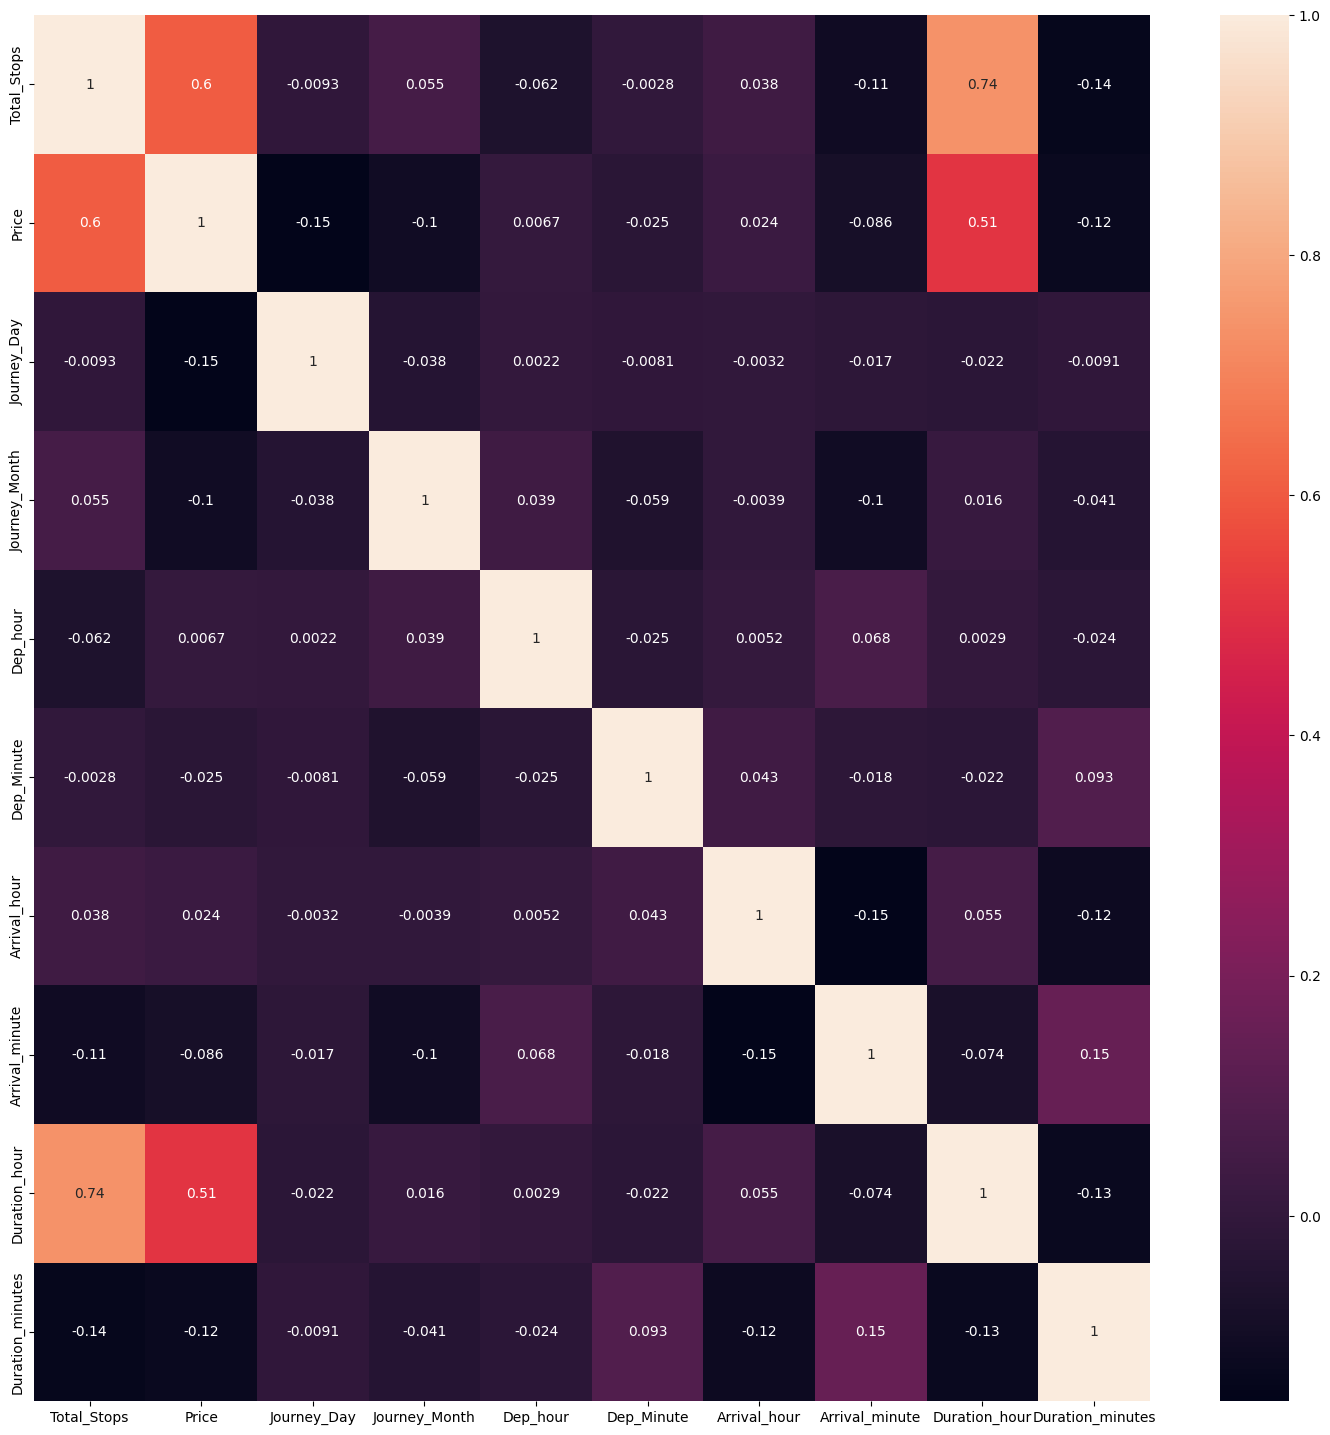

In [204]:
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True)

plt.show()
     

In [205]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [206]:
selection.feature_importances_

array([2.59800580e-01, 1.43303716e-01, 5.36699289e-02, 2.41392742e-02,
       2.16962525e-02, 2.80348107e-02, 1.93848101e-02, 1.06486043e-01,
       1.75507274e-02, 8.36953534e-03, 1.72614318e-03, 1.80741903e-02,
       1.33027713e-01, 6.67610316e-02, 1.99059357e-02, 8.81540443e-04,
       2.86003790e-03, 9.88408785e-05, 5.04211834e-03, 8.20577930e-05,
       5.58564635e-04, 7.47664417e-03, 3.33357852e-03, 6.25447630e-03,
       9.84112085e-03, 1.13304236e-02, 4.86540337e-03, 4.48055797e-04,
       2.49964466e-02])

In [207]:
selection_feature=pd.Series(selection.feature_importances_, index=X.columns)
selection_feature

Total_Stops                                  0.259801
Journey_Day                                  0.143304
Journey_Month                                0.053670
Dep_hour                                     0.024139
Dep_Minute                                   0.021696
Arrival_hour                                 0.028035
Arrival_minute                               0.019385
Duration_hour                                0.106486
Duration_minutes                             0.017551
Airline_Air India                            0.008370
Airline_GoAir                                0.001726
Airline_IndiGo                               0.018074
Airline_Jet Airways                          0.133028
Airline_Jet Airways Business                 0.066761
Airline_Multiple carriers                    0.019906
Airline_Multiple carriers Premium economy    0.000882
Airline_SpiceJet                             0.002860
Airline_Trujet                               0.000099
Airline_Vistara             

<Axes: >

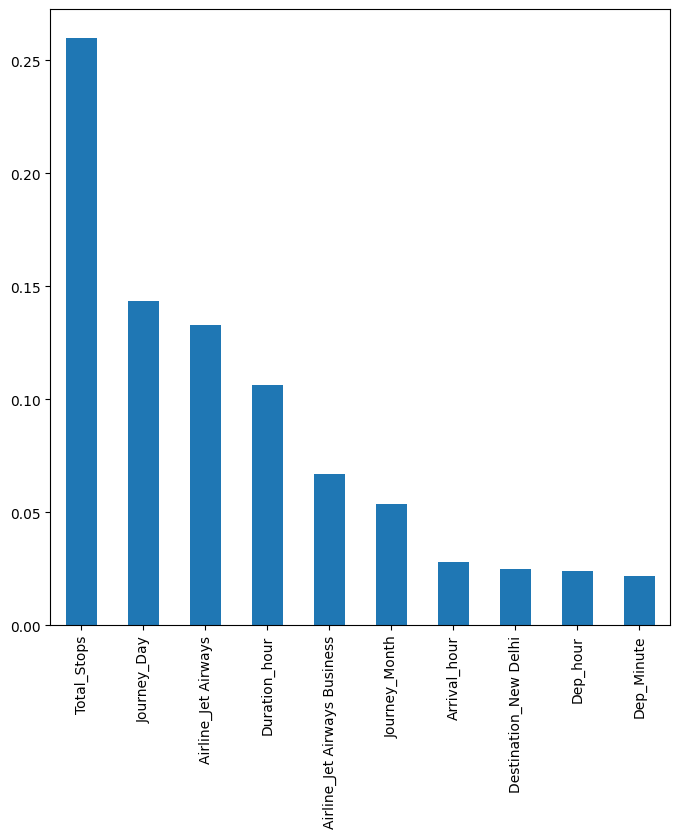

In [208]:
plt.figure(figsize=(8,8))
selection_feature.nlargest(10).plot(kind="bar")

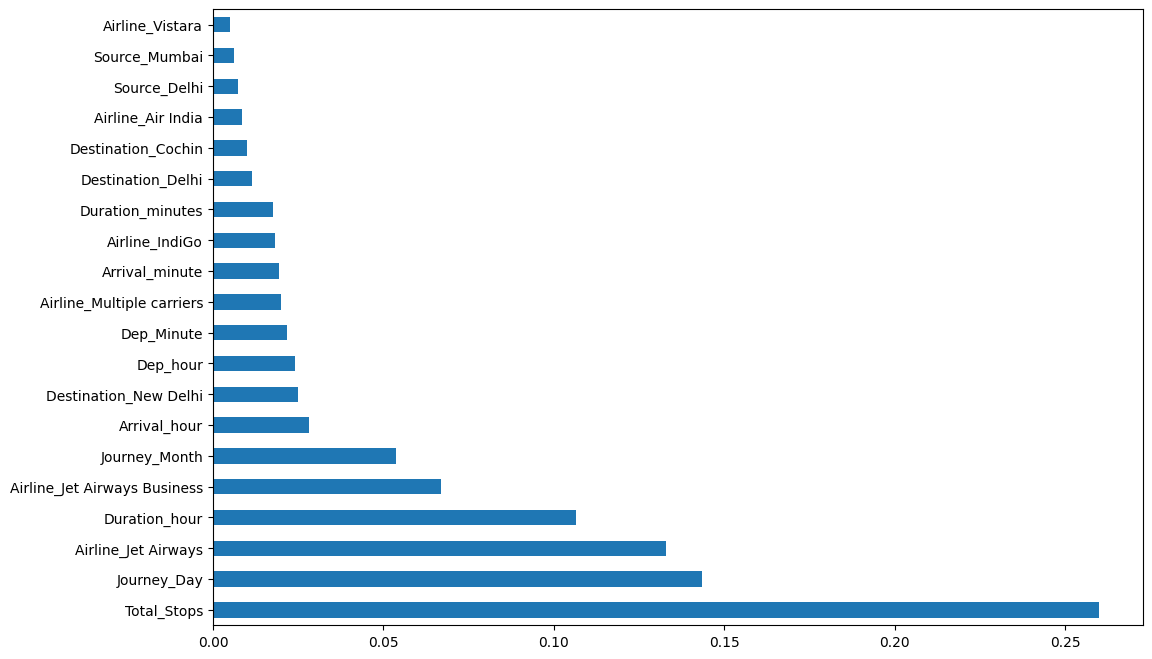

In [209]:
### Total_stops column is an important feature
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind = "barh")
plt.show()

### Fitting model using Random Forest

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [211]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [212]:
y_pred = reg_rf.predict(X_test)

In [213]:

reg_rf.score(X_train, y_train)

0.954461039471848

In [214]:
reg_rf.score(X_test, y_test)

0.7991484734922715

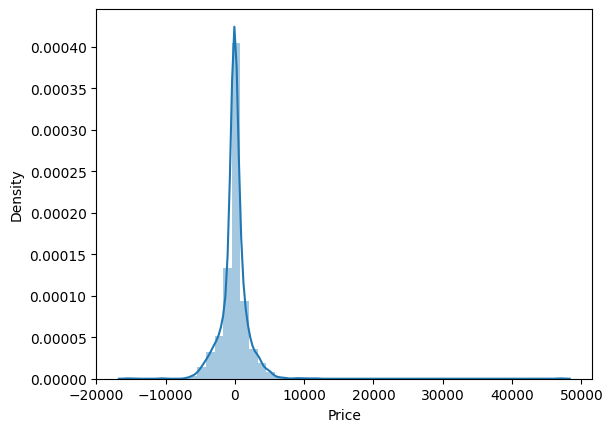

In [215]:
sns.distplot(y_test- y_pred)
plt.show()

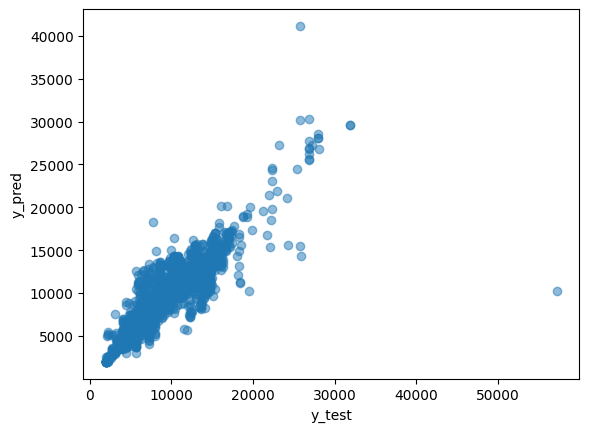

In [216]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [217]:

from sklearn import metrics

In [218]:
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

MAE: 1137.7651662799715
MSE: 4240329.422189562
RMSE: 33.73077476548636


In [219]:

metrics.r2_score(y_test, y_pred)

0.7991484734922715

In [220]:
2090.5509/(max(y)-min(y))

0.026887077025966846

### Hyperparameter Tunning

In [221]:

from sklearn.model_selection import RandomizedSearchCV

In [222]:
n_estimators = [int(x) for x in np.linspace(start=100, stop = 100, num = 12 )]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [223]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,}

In [224]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2,random_state=42, n_jobs=1)

In [225]:
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 100, 100, 100,
                                                         100, 100, 100, 100,
                                                         100, 100, 100, 100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [226]:
rf_random.fit(X_train, y_train)
    

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, max_features=s

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 100, 100, 100,
                                                         100, 100, 100, 100,
                                                         100, 100, 100, 100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [227]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [228]:
prediction = rf_random.predict(X_test)

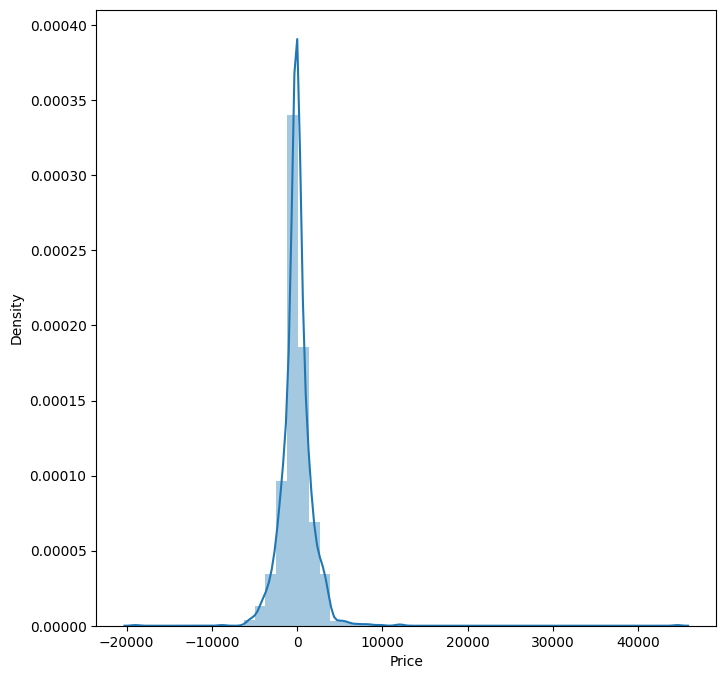

In [229]:
plt.figure(figsize= (8,8))
sns.distplot(y_test-prediction)
plt.show()

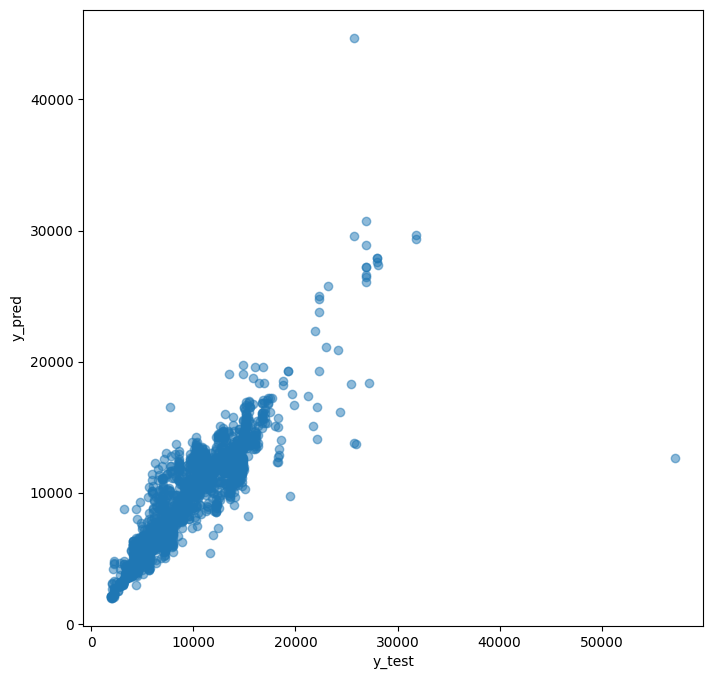

In [230]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [231]:
print("MAE:", metrics.mean_absolute_error(y_test, prediction))
print("MSE:", metrics.mean_squared_error(y_test, prediction))
print("RMSE:", np.sqrt(metrics.mean_absolute_error(y_test,prediction)))

MAE: 1129.5579547034595
MSE: 3845909.473367284
RMSE: 33.608896957553654


### Saving the model

In [232]:
import pickle
     

In [233]:
file = open('flight_rf.pkl', 'wb')
pickle.dump(rf_random, file)

In [234]:
model = open('flight_rf.pkl','rb' )
forest = pickle.load(model)

In [235]:
y_prediction = forest.predict(X_test)

In [236]:
metrics.r2_score(y_test, y_prediction)

0.8178309485828856